In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib

In [2]:
dataset_path = "dataset"

train_path = os.path.join(dataset_path, "training_set")
test_path = os.path.join(dataset_path, "test_set")

print("Training path:", train_path)
print("Testing path:", test_path)

Training path: dataset\training_set
Testing path: dataset\test_set


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes:", training_set.class_indices)

Found 3793 images belonging to 2 classes.
Found 785 images belonging to 2 classes.
Classes: {'Burger': 0, 'PIzza': 1}


In [5]:
from tensorflow.keras.layers import Input

num_classes = len(training_set.class_indices)

model = Sequential()

# Explicit Input Layer (recommended way)
model.add(Input(shape=(224,224,3)))

# First Convolution Layer
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolution Layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    training_set,
    epochs=10,
    validation_data=test_set
)

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.6267 - loss: 0.9518 - val_accuracy: 0.7987 - val_loss: 0.5132
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.7899 - loss: 0.4605 - val_accuracy: 0.8357 - val_loss: 0.3873
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8110 - loss: 0.4238 - val_accuracy: 0.8382 - val_loss: 0.3714
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.8197 - loss: 0.4010 - val_accuracy: 0.8535 - val_loss: 0.3326
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.8463 - loss: 0.3619 - val_accuracy: 0.8854 - val_loss: 0.2974
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.8521 - loss: 0.3302 - val_accuracy: 0.8739 - val_loss: 0.2881
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.8590 - loss: 0.3335 - val_accuracy: 0.8815 - val_loss: 0.2781
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.8727 - loss: 0.3072 - val_accu

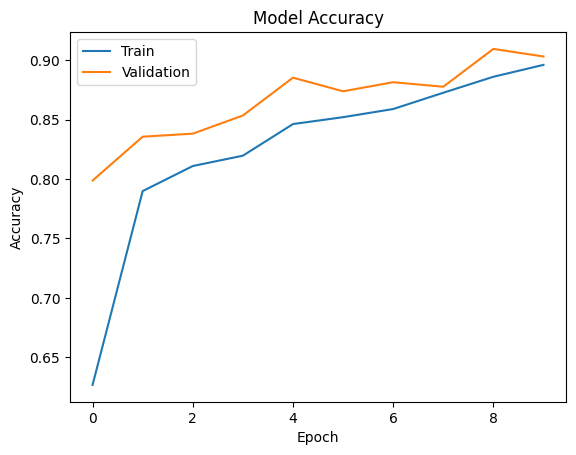

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

In [9]:
# Save normal keras model
model.save("food_classifier.keras")

# Save using joblib
joblib.dump(model, "food_model.pkl")

print("Model saved successfully.")


Model saved successfully.


In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your image
img_path = "dataset/single_prediction/pa.jpg"

# Load image
img = image.load_img(img_path, target_size=(224,224))
img = img.convert("RGB")   # ensures correct format

# Convert to array
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

# Get class names in correct order
class_indices = training_set.class_indices
class_names = list(class_indices.keys())

confidence = float(np.max(prediction))
predicted_class = class_names[np.argmax(prediction)]

THRESHOLD = 0.80

print("Raw Prediction Probabilities:", prediction)

if confidence >= THRESHOLD:
    print("Prediction:", predicted_class)
else:
    print("Prediction: Not Pizza and Not Burger")

print("Confidence:", round(confidence * 100, 2), "%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Raw Prediction Probabilities: [[0.00636271 0.9936373 ]]
Prediction: PIzza
Confidence: 99.36 %
